# Music Genre Classification- Spotify Factors for Popularity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [3]:
data = pd.read_csv("top10s.csv")

data

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [14]:
df = data

X_data = df[['bpm', 'nrgy', 'dnce', 'dB']]


Y_data = df['top genre']


X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(knn.predict([[104,25,61,0]]))


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

['canadian pop']
Accuracy: 0.45
Classification Report:
                            precision    recall  f1-score   support

             alaska indie       0.00      0.00      0.00         0
                  art pop       0.00      0.00      0.00         3
              atl hip hop       0.00      0.00      0.00         1
         australian dance       0.00      0.00      0.00         1
           australian pop       0.00      0.00      0.00         0
            barbadian pop       0.00      0.00      0.00         3
              baroque pop       0.00      0.00      0.00         1
                 big room       0.00      0.00      0.00         3
                 boy band       0.00      0.00      0.00         3
             british soul       1.00      0.50      0.67         2
canadian contemporary r&b       0.00      0.00      0.00         1
           canadian latin       0.00      0.00      0.00         1
             canadian pop       0.00      0.00      0.00         9
     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/s

 All of the variables and what they mean: 
 
    - title = title of the song
    - artist = song's artist
    - top genre = genre of the track
    - year = song's year in the Billboard
    - bpm = beats per minute or the tempo of the song
    - nrgy = energy or the energy of a song, calculated through a higher the value, the more energetic the song is
    - dnce = dancability meaning the higher the value the easier it is to dance to 
    - dB = loudness, the higher the value the louder it is 
    - live = liveliness, the higher the value the more likely the song is a live recording
    - val = calence, the higher it is, the more positive mood for the song
    - dur = the length of the song
    - acous = the more accoustic the song is
    - spch = the more spoken word the song contains
    - pop = the higher, the more popular the song is

# BPM vs Popularity

# Energy vs Popularity

# Dancability vs Popularity

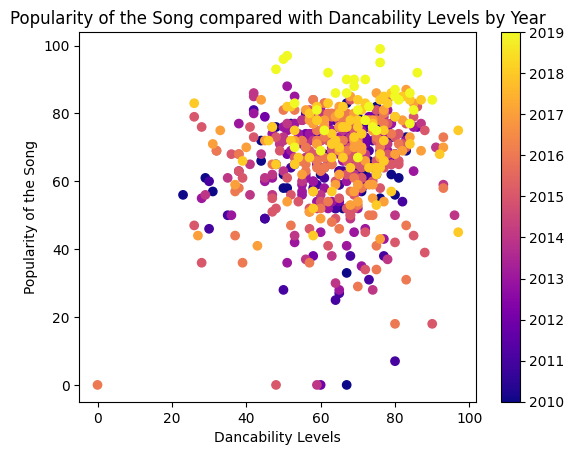

In [5]:
plt.scatter(data["dnce"], data["pop"], c=data["year"], cmap="plasma")

plt.colorbar()

plt.xlabel("Dancability Levels")
plt.ylabel("Popularity of the Song")
plt.title("Popularity of the Song compared with Dancability Levels by Year")


plt.show()

# Loudness (dB) vs Popularity with Linear Regression

Data was fit using OLS fit

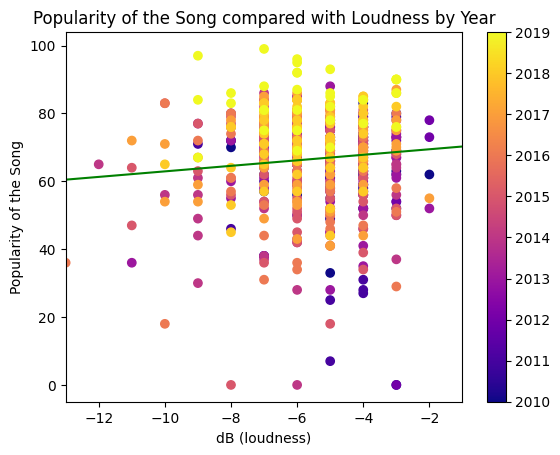

In [6]:
plt.scatter(data["dB"], data["pop"], c=data["year"], cmap="plasma")

plt.colorbar()

plt.xlabel("dB (loudness)")
plt.ylabel("Popularity of the Song")
plt.xlim(-13,-1)
plt.title("Popularity of the Song compared with Loudness by Year")

X = data[["dB"]]
y = data["pop"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

x_min = -13
x_max = -1
y_min = model.predict([1, x_min])
y_max = model.predict([1, x_max])
plt.plot([x_min, x_max], [y_min, y_max], color="green")

plt.show()

# Masking for only 2019 songs

In [8]:
mask = (data["year"] == 2019)

In [11]:
data_2019 = data[mask]
data_2019

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
573,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
574,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
575,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
576,577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93
577,578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
578,579,Trampoline (with ZAYN),SHAED,electropop,2019,127,46,62,-6,14,50,184,56,3,92
579,580,Happier,Marshmello,brostep,2019,100,79,69,-3,17,67,214,19,5,90
580,581,Truth Hurts,Lizzo,escape room,2019,158,62,72,-3,12,41,173,11,11,90
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,96,89,67,-3,74,48,159,30,6,90


In [92]:
import statsmodels.api as sm

pop_data = data[data["top genre"] == "pop"]
nonpop_data = data[data["top genre"] != "pop"]

pop_model = sm.OLS(pop_data["pop"], sm.add_constant(pop_data[["bpm", "nrgy"]])).fit()
nonpop_model = sm.OLS(nonpop_data["pop"], sm.add_constant(nonpop_data[["bpm", "nrgy"]])).fit()

# print("Pop genre model:")
# print(pop_model.summary())
print("\nNon-pop genre model:")
print(nonpop_model.summary())


Non-pop genre model:
                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8955
Date:                Tue, 04 Apr 2023   Prob (F-statistic):              0.409
Time:                        20:08:07   Log-Likelihood:                -2224.9
No. Observations:                 543   AIC:                             4456.
Df Residuals:                     540   BIC:                             4469.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2731      3.8

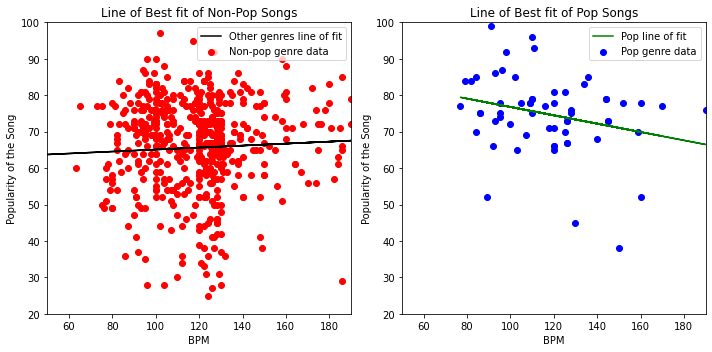

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# subplot for non-pop genre data
a, b = np.polyfit(nonpop_data["bpm"], nonpop_data["pop"], 1)
ax1.scatter(nonpop_data["bpm"], nonpop_data["pop"], color='red', label = "Non-pop genre data")
ax1.plot(nonpop_data["bpm"], a*nonpop_data['bpm']+b, color = "black", label = "Other genres line of fit")
ax1.set_xlim(50,190)
ax1.set_ylim(20,100)
ax1.set_xlabel('BPM')
ax1.set_ylabel('Popularity of the Song')
ax1.legend()
ax1.set_title("Line of Best fit of Non-Pop Songs")

# subplot for pop genre data
c, d = np.polyfit(pop_data["bpm"], pop_data["pop"], 1)
ax2.scatter(pop_data["bpm"], pop_data["pop"], color='blue', label = "Pop genre data")
ax2.plot(pop_data["bpm"], c*pop_data['bpm']+d, color = "green", label = "Pop line of fit")
ax2.set_xlim(50,190)
ax2.set_ylim(20,100)
ax2.set_xlabel('BPM')
ax2.set_ylabel('Popularity of the Song')
ax2.legend()
ax2.set_title("Line of Best fit of Pop Songs")

plt.tight_layout()
plt.show()

# CLF

In [ ]:
#data2 = np.arange(603).reshape((-1,1))


In [18]:
# train_vectors, test_vectors,train_labels, test_labels = train_test_split(data["pop"], data["bpm"], test_size=0.25, random_state=420)


In [16]:
# start = time.time()

# tmp_vectors = train_vectors
# tmp_labels = train_labels

# print("Fitting the classifier to the training set")

# param_grid = {'C': [1e3, 5e3, 1e4, 5e4],
#                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
#                'kernel': ['linear','rbf']}
# clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)


# clf = clf.fit(tmp_vectors, tmp_labels)
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)
# print("Best parameters found by grid search:")
# print(clf.best_params_)

# end = time.time()
# print("Runtime",end - start)

error states "Expected 2D array, got 1D array"

In [17]:
# predict_vectors = test_vectors
# true_labels = test_labels

# print("Predicting names on the test set")
# pred_labels = clf.predict(predict_vectors)

# print(classification_report(true_labels, pred_labels))
# print(confusion_matrix(true_labels, pred_labels, labels=range(n_classes)))


# Making a Class to add in personal favorite song

In [35]:
class FavSong:

    def __init__(self, year):
    
        self.year = year

    def set_name(self):
        self.name = name
        
    def set_year(self):
        self.year = year
        
    def get_name(self):
        return self.name


In [37]:
# temp = FavSong(2019)
# temp.set_name("julia")
# temp.get_name()